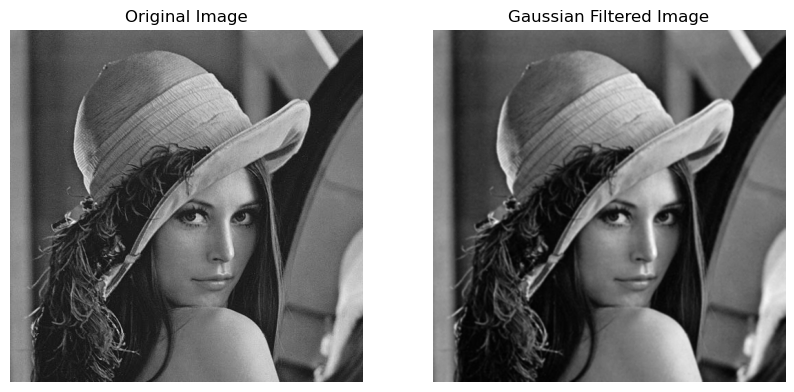

In [2]:
import os
import numpy as np
import cv2
from matplotlib import pyplot as plt

def gaussian_filter(size, sigma=None):
    """
    Generates a Gaussian filter (kernel) with specified size and standard deviation (sigma).
    
    Parameters:
    - size (int): The size of the filter (e.g., 3 for 3x3, 5 for 5x5, etc.). Must be an odd number.
    - sigma (float): The standard deviation of the Gaussian function. If None, it defaults to size / 6.
    
    Returns:
    - kernel (numpy.ndarray): A normalized 2D Gaussian filter of the specified size.
    """
    # Ensure the filter size is an odd number
    if size % 2 == 0:
        raise ValueError("Filter size must be an odd number.")
    
    # Set sigma based on size if not provided
    if sigma is None:
        sigma = size / 6.0
    
    # Initialize the filter
    kernel = np.zeros((size, size), dtype=np.float32)
    
    # Calculate the center position
    center = size // 2
    
    # Fill the filter using the Gaussian formula
    for i in range(size):
        for j in range(size):
            x, y = i - center, j - center
            kernel[i, j] = np.exp(-(x**2 + y**2) / (2 * sigma**2))
    
    # Normalize the filter
    kernel /= 2 * np.pi * sigma**2
    kernel /= kernel.sum()
    
    return kernel

# Load the image
lena_path = os.path.join(os.getcwd(), 'data', 'images', 'lena_color.jpg')
image = cv2.imread(lena_path, cv2.IMREAD_GRAYSCALE)

# Check if image loaded successfully
if image is None:
    raise IOError("Image file not found or unable to load.")

# Create a Gaussian filter
gaussian_kernel = gaussian_filter(size=5, sigma=1)

# Apply the Gaussian filter to the image using OpenCV's filter2D function
filtered_image = cv2.filter2D(image, -1, gaussian_kernel)

# Display the original and filtered images side by side
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Gaussian Filtered Image")
plt.imshow(filtered_image, cmap='gray')
plt.axis("off")

plt.show()
